In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<StemContainer object of 3 artists>

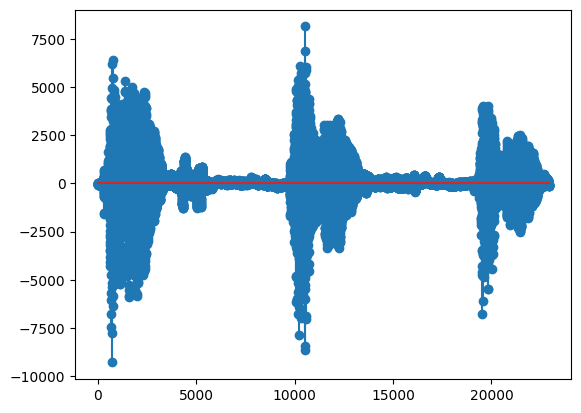

In [2]:
alo = np.memmap('/content/drive/MyDrive/Processamento_Digital_De_Sinais/Aula_5/aloprofessor.pcm', mode='r', dtype=np.int16)

array = np.arange(np.size(alo))

plt.stem(array, alo)

In [7]:
tamanho_bloco = 40
threshold=2000

saida = np.zeros(np.size(alo))

saida = np.copy(alo)

# Processa o vetor em blocos do tamanho especificado
for i in range(0, np.size(saida), tamanho_bloco):
  bloco = saida[i:i+tamanho_bloco]
  # Verifica se todos os elementos do bloco são menores que o threshold
  if all(elemento < threshold for elemento in bloco):
    # Se todos os elementos são menores que o threshold, eles são zerados
    saida[i:i+tamanho_bloco] = [0]*np.size(bloco)

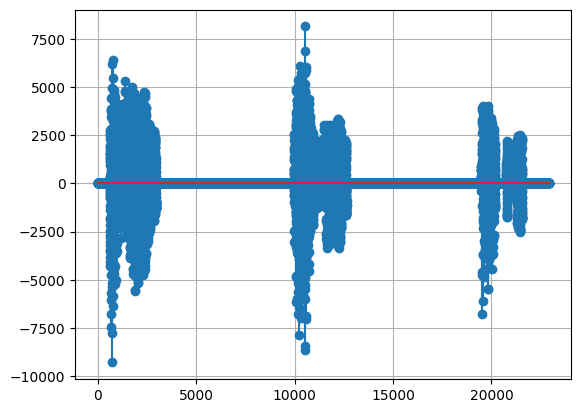

In [8]:
plt.stem(array, saida)
plt.grid()

In [ ]:
from scipy.io.wavfile import write

write('sinal_saida_detector.pcm', 8000, saida.astype(np.int16))

Filtro

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
cutoff_freq = 1000 # Frequência de corte (Hz)
nyquist_freq = 0.5 * 8000 # Frequência de Nyquist
normalized_cutoff = cutoff_freq / nyquist_freq

# lowpass highpass
b, a = butter(4, normalized_cutoff, btype='highpass', analog=False)

filter_signal = lfilter(b, a, alo)

# Normalizar o sinal filtrado para evitar estouro
filter_signal = np.int16(filter_signal / np.max(np.abs(filter_signal)) * 32767)


<StemContainer object of 3 artists>

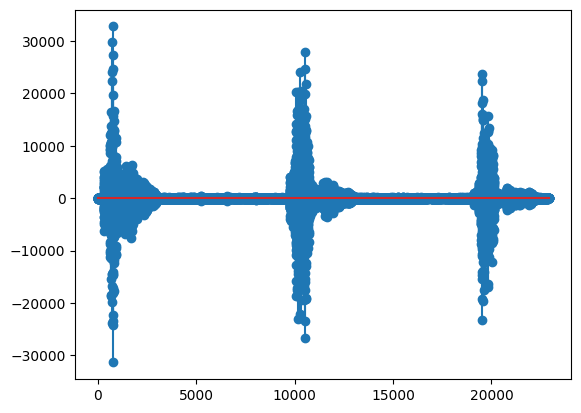

In [ ]:
plt.stem(array, filter_signal)